In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('./relabeled_data.csv')
df['label'] = df['filename'].apply(lambda x: x.split('.')[0])

In [2]:
df.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


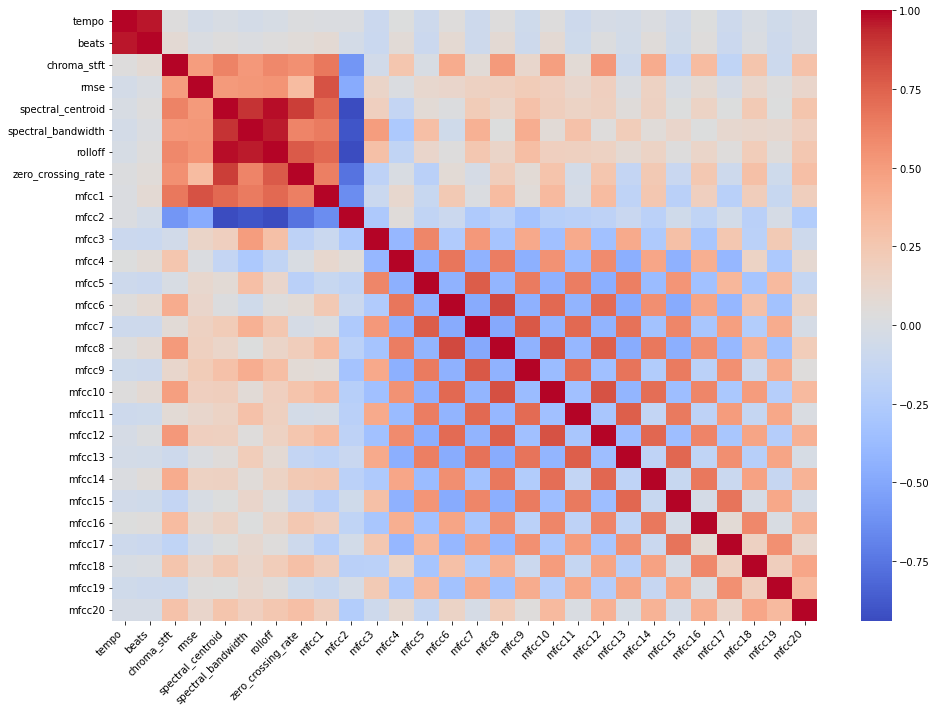

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
features_data = df.drop(['filename', 'label'], axis=1)
# Calculating the correlation matrix
corr = features_data.corr()
# Setting up the matplotlib figure
plt.figure(figsize=(14, 10))
# Drawing the heatmap
sns.heatmap(corr, annot=False, fmt=".2f", cmap='coolwarm')
# Adjusting the plot to make it more readable
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
# Showing the plot
plt.show()


In [4]:
import numpy as np
# Create a correlation matrix
corr_matrix = features_data.corr().abs()
# Modified line without deprecation warning
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
highly_correlated_pairs = [(row, col) for col in to_drop for row in upper.index if upper.loc[row, col] > 0.9]
highly_correlated_pairs

[('tempo', 'beats'),
 ('spectral_centroid', 'spectral_bandwidth'),
 ('spectral_centroid', 'rolloff'),
 ('spectral_bandwidth', 'rolloff'),
 ('spectral_centroid', 'mfcc2'),
 ('rolloff', 'mfcc2')]

In [5]:
# Based on the analysis, we drop 'tempo', 'spectral_centroid', and 'rolloff'
features_to_drop = ['tempo', 'spectral_centroid', 'rolloff']
reduced_data = df.drop(features_to_drop, axis=1)
# Now let's see the remaining features
reduced_data.head()

,filename,beats,chroma_stft,rmse,spectral_bandwidth,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,50,0.380260,0.248262,1956.611056,0.127272,-26.929785,107.334008,-46.809993,40.932634,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,44,0.306451,0.113475,1497.668176,0.058613,-233.860772,136.170239,3.289490,48.931193,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,75,0.253487,0.151571,1973.643437,0.042967,-221.802549,110.843070,18.620984,30.922996,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,91,0.269320,0.119072,1567.804596,0.069124,-207.208080,132.799175,-15.438986,60.986727,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,74,0.391059,0.137728,2052.332563,0.075480,-145.434568,102.829023,-12.517677,56.993472,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [6]:
from sklearn.model_selection import train_test_split

# Dropping non-feature columns and labels to form the feature set X
X = reduced_data.drop(['filename', 'label'], axis=1)
# Labels
y = reduced_data['label']

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the resulting sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((800, 25), (200, 25), (800,), (200,))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models with default parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Dictionary to hold accuracy scores for each model
accuracy_scores = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
# Display the accuracy scores for all models
accuracy_scores


Logistic Regression Accuracy: 0.6100
SVM Accuracy: 0.6050
Decision Tree Accuracy: 0.4350
Random Forest Accuracy: 0.6200


{'Logistic Regression': 0.61,
 'SVM': 0.605,
 'Decision Tree': 0.435,
 'Random Forest': 0.62}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Creating a more fine-grained set of values for C using np.linspace
C_range = np.linspace(0.01, 10, 20)
#C_range =[0.01,0.1,0.5,1,5,10]
# Updating the parameter grid with the new C_range
param_grid_fine = {
    'C': C_range,
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers support l1 penalty
}
log_reg = LogisticRegression(max_iter=5000)
# Initialize the GridSearchCV object with the new param_grid
grid_search_fine = GridSearchCV(estimator=log_reg, param_grid=param_grid_fine, cv=10, scoring='accuracy', verbose=1)
# Perform the grid search on the scaled training data
grid_search_fine.fit(X_train, y_train)
# Best parameters and best score with fine-grained C
best_params_fine = grid_search_fine.best_params_
best_score_fine = grid_search_fine.best_score_
best_params_fine, best_score_fine

Fitting 10 folds for each of 80 candidates, totalling 800 fits
